<a href="https://colab.research.google.com/github/cher16/FDSfE_ANjoku/blob/main/HW3/HW3_citibikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

# IDEA:
 Citibike usage would be different by gender if the bikes are more comfortable for people who are taller and with larger frames.

Remember: 
### NULL HYPOTHESIS _H0_:
mu1 = mu2


### ALTERNATIVE HYPOTHESIS _HA_:
mu1 != mu2




In [129]:
pvalue = 0.05

# Data gathering
Get a single month of data:  reading data from citibike csv file from May 2019



read a csv file with pandas so that the content is stored in a "DataFrame". 

In [130]:
datestring = '201905'
cbMay19 = pd.read_csv("https://s3.amazonaws.com/tripdata/"+ datestring + "-citibike-tripdata.csv.zip", compression = "zip");
cbMay19

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2
1924560,1926,2019-05-31 23:59:51.5060,2019-06-01 00:31:58.3920,146,Hudson St & Reade St,40.716250,-74.009106,422,W 59 St & 10 Ave,40.770513,-73.988038,33395,Subscriber,1985,1
1924561,2047,2019-05-31 23:59:52.4170,2019-06-01 00:34:00.1970,3658,W 18 St & 9 Ave,40.743534,-74.003676,2008,Little West St & 1 Pl,40.705693,-74.016777,27624,Subscriber,1987,0


# Data Exploration

you know what to do!

In [131]:
cbMay19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924563 entries, 0 to 1924562
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 220.2+ MB


In [132]:
cbMay19.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06
mean,1.067189e+03,1.671397e+03,4.073698e+01,-7.398223e+01,1.664596e+03,4.073675e+01,-7.398248e+01,2.712861e+04,1.979833e+03,1.152992e+00
std,1.254636e+04,1.473509e+03,3.062224e-02,1.970116e-02,1.473196e+03,3.048823e-02,1.976340e-02,6.404188e+03,1.199213e+01,5.516776e-01
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.402535e+01,7.200000e+01,4.065540e+01,-7.406860e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.790000e+02,3.820000e+02,4.071740e+01,-7.399595e+01,3.800000e+02,4.071723e+01,-7.399601e+01,2.082600e+04,1.969000e+03,1.000000e+00
50%,6.530000e+02,5.160000e+02,4.073726e+01,-7.398518e+01,5.150000e+02,4.073705e+01,-7.398584e+01,2.878200e+04,1.982000e+03,1.000000e+00
75%,1.158000e+03,3.293000e+03,4.075757e+01,-7.397121e+01,3.292000e+03,4.075715e+01,-7.397152e+01,3.257600e+04,1.990000e+03,1.000000e+00
max,2.922656e+06,3.790000e+03,4.081439e+01,-7.390774e+01,3.790000e+03,4.081439e+01,-7.390774e+01,3.800200e+04,2.003000e+03,2.000000e+00


In [133]:
cbMay19.shape

(1924563, 15)

In [134]:
print("The cbMay19 dataframe has the following dimensions "+ format(cbMay19.shape))

The cbMay19 dataframe has the following dimensions (1924563, 15)


In [135]:
cbMay19.head

<bound method NDFrame.head of          tripduration                 starttime                  stoptime  \
0                 139  2019-05-01 00:00:01.9010  2019-05-01 00:02:21.5170   
1                 754  2019-05-01 00:00:03.0210  2019-05-01 00:12:37.6920   
2                2308  2019-05-01 00:00:04.6270  2019-05-01 00:38:33.1710   
3                 143  2019-05-01 00:00:19.3340  2019-05-01 00:02:42.5200   
4                 138  2019-05-01 00:00:22.1840  2019-05-01 00:02:40.6480   
...               ...                       ...                       ...   
1924558           304  2019-05-31 23:59:45.5760  2019-06-01 00:04:50.4620   
1924559           324  2019-05-31 23:59:46.4650  2019-06-01 00:05:11.1630   
1924560          1926  2019-05-31 23:59:51.5060  2019-06-01 00:31:58.3920   
1924561          2047  2019-05-31 23:59:52.4170  2019-06-01 00:34:00.1970   
1924562           964  2019-05-31 23:59:55.5500  2019-06-01 00:15:59.8680   

         start station id         start stati

In [136]:
cbMay19.tail

<bound method NDFrame.tail of          tripduration                 starttime                  stoptime  \
0                 139  2019-05-01 00:00:01.9010  2019-05-01 00:02:21.5170   
1                 754  2019-05-01 00:00:03.0210  2019-05-01 00:12:37.6920   
2                2308  2019-05-01 00:00:04.6270  2019-05-01 00:38:33.1710   
3                 143  2019-05-01 00:00:19.3340  2019-05-01 00:02:42.5200   
4                 138  2019-05-01 00:00:22.1840  2019-05-01 00:02:40.6480   
...               ...                       ...                       ...   
1924558           304  2019-05-31 23:59:45.5760  2019-06-01 00:04:50.4620   
1924559           324  2019-05-31 23:59:46.4650  2019-06-01 00:05:11.1630   
1924560          1926  2019-05-31 23:59:51.5060  2019-06-01 00:31:58.3920   
1924561          2047  2019-05-31 23:59:52.4170  2019-06-01 00:34:00.1970   
1924562           964  2019-05-31 23:59:55.5500  2019-06-01 00:15:59.8680   

         start station id         start stati

# <mark>WFF</mark> You did all of the technically correct things when exploring this data, but the way you did it makes it really hard to actually analyse. It is printing out in a way that is difficult to read, so in the future it may be important for you to actually.

In [137]:
columns = cbMay19
columns

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2
1924560,1926,2019-05-31 23:59:51.5060,2019-06-01 00:31:58.3920,146,Hudson St & Reade St,40.716250,-74.009106,422,W 59 St & 10 Ave,40.770513,-73.988038,33395,Subscriber,1985,1
1924561,2047,2019-05-31 23:59:52.4170,2019-06-01 00:34:00.1970,3658,W 18 St & 9 Ave,40.743534,-74.003676,2008,Little West St & 1 Pl,40.705693,-74.016777,27624,Subscriber,1987,0


# <mark>WFF</mark> You called this variable columns but it does not contain the columns.

In [138]:
tripdurationmax = cbMay19[cbMay19["gender"] == cbMay19["gender"].max()]
tripdurationmax

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
9,2733,2019-05-01 00:01:30.8120,2019-05-01 00:47:04.3080,3630,Frederick Douglass Blvd & W 115 St,40.803865,-73.955931,3628,Lenox Ave & W 117 St,40.802557,-73.949078,33792,Subscriber,1985,2
10,236,2019-05-01 00:01:36.4020,2019-05-01 00:05:33.1980,3232,Bond St & Fulton St,40.689622,-73.983043,3411,Bond St & Bergen St,40.684967,-73.986208,34411,Subscriber,1957,2
12,536,2019-05-01 00:01:44.6580,2019-05-01 00:10:41.3390,243,Fulton St & Rockwell Pl,40.688410,-73.979458,397,Fulton St & Clermont Ave,40.684157,-73.969223,30962,Subscriber,1974,2
20,290,2019-05-01 00:02:27.8000,2019-05-01 00:07:18.1110,346,Bank St & Hudson St,40.736529,-74.006180,168,W 18 St & 6 Ave,40.739713,-73.994564,30209,Subscriber,1984,2
22,553,2019-05-01 00:02:37.0480,2019-05-01 00:11:50.9870,448,W 37 St & 10 Ave,40.756604,-73.997901,485,W 37 St & 5 Ave,40.750380,-73.983390,21028,Subscriber,1989,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924554,699,2019-05-31 23:59:40.5130,2019-06-01 00:11:20.1020,368,Carmine St & 6 Ave,40.730386,-74.002150,470,W 20 St & 8 Ave,40.743453,-74.000040,16373,Subscriber,1976,2
1924556,432,2019-05-31 23:59:42.1250,2019-06-01 00:06:54.9420,358,Christopher St & Greenwich St,40.732916,-74.007114,405,Washington St & Gansevoort St,40.739323,-74.008119,34352,Customer,1985,2
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2


You should have noticed the column gender: its encoded as a binary - 1 is for customers that identified as male, 2 for customers that identified as female. 0 is for non-binary and not registered genders

Because your variable of interest is "tripduration" explore this variable in some more detail. 

## Plot the trip duration distribution

hint: when I say plot the distribution generally that means make a histogram


Figure 1:. ...

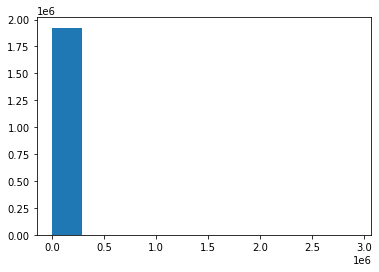

In [139]:
plt.hist(cbMay19.tripduration);

# <mark>WFF</mark> Missing figure captions here. Captions should be descriptive and explain the significance of the plot.

there are some really large numbers... trips that last >1000000 minutes...  clearly this is a data curation issue. 

You need to clean the data by removing all data for which tripduration > 1 day (remember the duration is in minutes) and remake the plot


You can do it by setting the condition 

```cbMay19["tripduration"] < ...```

and using this condition as an index

```cbMay19_clean = cbMay19[cbMay19["tripduration"]....```

Remake the histogram, now the shape of the tripduration distribution should be much clearer

In [140]:
cbMay19_clean = cbMay19[cbMay19["tripduration"]<1440]

Figure 2: ...

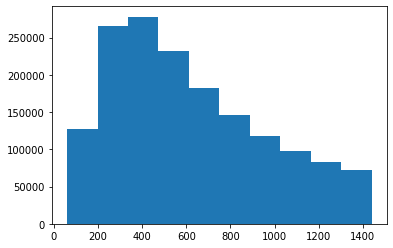

In [141]:
plt.hist(cbMay19_clean["tripduration"]);

# <mark>WFF</mark> Missing captions again

# Data Wrangling 

Split the data into two dataframes by gender
save the data corresponding to "gender" == 1 and the data corresponding to "gender" == 2 into two separate dataframes. Again you can do it by setting a condition on the column ```["gender"]```

In [142]:
gender = cbMay19.gender
gender

0          1
1          0
2          1
3          1
4          1
          ..
1924558    2
1924559    2
1924560    1
1924561    0
1924562    2
Name: gender, Length: 1924563, dtype: int64

In [143]:
male = cbMay19_clean[cbMay19_clean['gender']==1]

In [144]:
female = cbMay19_clean[cbMay19_clean['gender']==2]

Plotting the trip duration distributions for gender=1 and gender=2



Figure 3:...

Text(0, 0.5, 'Number of trips recorded')

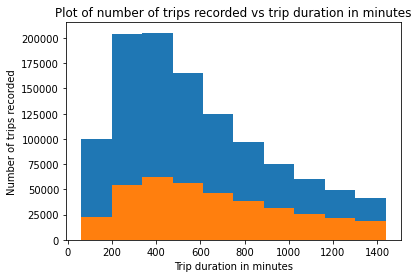

In [145]:
plt.hist(male['tripduration'])
plt.hist(female['tripduration'])
plt.title("Plot of number of trips recorded vs trip duration in minutes")
plt.xlabel("Trip duration in minutes")
plt.ylabel("Number of trips recorded")

The two histograms have different heights because the male category(blue colored bars) has more trips than the female category(orange colored bars)

# <mark>WFF</mark> Missing captions

# Statistical analysis
Run two statistical tests: the t-test and the KS-test. 



To answer the question more formally  test you can use the t-test. You can use the ```ttest_ind`` function in python ```scipy.stats.ttest_ind()``` passing the first sample for a and the other for b (ind stands for independent, i.e. the assumption is that the sample are independent samples)

In [146]:
# get the usage information for the function here or on the webpage of the function
stats.ttest_ind(male['tripduration'], female['tripduration'])

Ttest_indResult(statistic=-100.84403665697793, pvalue=0.0)

In [147]:
stats.ks_2samp(male["tripduration"], female["tripduration"])

KstestResult(statistic=0.08422140452629323, pvalue=0.0)

Pvalue of zero in both tests shows that we can reject the null hypothesis




# <mark>WFF</mark> We are missing an explicit statement of your H0 and HA for your t-test. When you say that "we can reject the null hypothesis" you need to be more specific because the null hypothesis is different for the t-test (that the two means are the same) and for the ks-test (that the two samples come from the same distribution).

# Are the sample coming from the same parent distribution

The next test answers the questions: do the samples come from the same generative process (or "parent function"). Often we write the hypothesis for this test more simple as "are the distributions the same"





Write the NULL and Alternative hypothesis here

Run the test ```stats.ks_2samp```

In [148]:
stats.ks_2samp(male["tripduration"], female["tripduration"])

KstestResult(statistic=0.08422140452629323, pvalue=0.0)

In fact this test is very sensitive to differences in the mean of the sample. To use the test properly one should first normalize the data. That is: subtract the mean and divide by the standard deviation. This is how you would do it (my two clean samples for gender = 1 and gender = 2 are called cbMay19_m and cbMay19_f, yours will be possibly called differently)

In [149]:
male["tripduration"].mean()

588.2070911461445

In [150]:
female["tripduration"].mean()

652.1760137019039

In [151]:
normed_female = (female["tripduration"] - female["tripduration"].mean()) / female["tripduration"].std()
normed_male = (male["tripduration"] - male["tripduration"].mean()) / male["tripduration"].std()

rerun the test after normalizing, did the conclusion change?

In [152]:
stats.ks_2samp(male["tripduration"], female["tripduration"])

KstestResult(statistic=0.08422140452629323, pvalue=0.0)

# <mark>WFF</mark> You did not end up using the normalized statistics for computing the ks-test this time.

The conclusion remained unchanged

# Extra Credit : do the same for week days only and weekends only

In [153]:
cbMay19_clean["starttime"]

0          2019-05-01 00:00:01.9010
1          2019-05-01 00:00:03.0210
3          2019-05-01 00:00:19.3340
4          2019-05-01 00:00:22.1840
6          2019-05-01 00:01:06.0520
                     ...           
1924555    2019-05-31 23:59:41.6790
1924556    2019-05-31 23:59:42.1250
1924558    2019-05-31 23:59:45.5760
1924559    2019-05-31 23:59:46.4650
1924562    2019-05-31 23:59:55.5500
Name: starttime, Length: 1601848, dtype: object

In [154]:
cbMay19_clean["tripdate"] = pd.to_datetime(cbMay19_clean.starttime)
cbMay19_clean["tripdate"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         2019-05-01 00:00:01.901
1         2019-05-01 00:00:03.021
3         2019-05-01 00:00:19.334
4         2019-05-01 00:00:22.184
6         2019-05-01 00:01:06.052
                    ...          
1924555   2019-05-31 23:59:41.679
1924556   2019-05-31 23:59:42.125
1924558   2019-05-31 23:59:45.576
1924559   2019-05-31 23:59:46.465
1924562   2019-05-31 23:59:55.550
Name: tripdate, Length: 1601848, dtype: datetime64[ns]

In [155]:
cbMay19_weekdays = cbMay19_clean[cbMay19_clean["tripdate"].dt.weekday < 5]
cbMay19_weekdays

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripdate
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1,2019-05-01 00:00:01.901
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0,2019-05-01 00:00:03.021
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1,2019-05-01 00:00:19.334
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1,2019-05-01 00:00:22.184
6,514,2019-05-01 00:01:06.0520,2019-05-01 00:09:40.1670,439,E 4 St & 2 Ave,40.726281,-73.989780,336,Sullivan St & Washington Sq,40.730477,-73.999061,15160,Subscriber,1988,1,2019-05-01 00:01:06.052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924555,432,2019-05-31 23:59:41.6790,2019-06-01 00:06:54.2000,382,University Pl & E 14 St,40.734927,-73.992005,507,E 25 St & 2 Ave,40.739126,-73.979738,21562,Subscriber,1995,1,2019-05-31 23:59:41.679
1924556,432,2019-05-31 23:59:42.1250,2019-06-01 00:06:54.9420,358,Christopher St & Greenwich St,40.732916,-74.007114,405,Washington St & Gansevoort St,40.739323,-74.008119,34352,Customer,1985,2,2019-05-31 23:59:42.125
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2,2019-05-31 23:59:45.576
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2,2019-05-31 23:59:46.465


In [156]:
cbMay19_weekends = cbMay19_clean[cbMay19_clean["tripdate"].dt.weekday >= 5]
cbMay19_weekends

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripdate
192003,426,2019-05-04 00:00:07.3100,2019-05-04 00:07:13.9450,3118,McGuinness Blvd & Eagle St,40.735550,-73.952840,3668,Leonard St & Nassau Ave,40.723957,-73.949844,17924,Subscriber,1980,1,2019-05-04 00:00:07.310
192004,778,2019-05-04 00:00:10.8690,2019-05-04 00:13:09.1860,3656,E 2 St & Avenue A,40.723077,-73.985836,2012,E 27 St & 1 Ave,40.739445,-73.976806,31269,Subscriber,1996,2,2019-05-04 00:00:10.869
192005,451,2019-05-04 00:00:15.6220,2019-05-04 00:07:47.0350,3087,Metropolitan Ave & Meeker Ave,40.714133,-73.952344,3083,Bushwick Ave & Powers St,40.712477,-73.941000,29921,Subscriber,1993,2,2019-05-04 00:00:15.622
192006,196,2019-05-04 00:00:20.7160,2019-05-04 00:03:37.0950,328,Watts St & Greenwich St,40.724055,-74.009660,257,Lispenard St & Broadway,40.719392,-74.002472,24996,Subscriber,1968,1,2019-05-04 00:00:20.716
192007,370,2019-05-04 00:00:21.0860,2019-05-04 00:06:31.8570,2003,1 Ave & E 18 St,40.733812,-73.980544,445,E 10 St & Avenue A,40.727408,-73.981420,30508,Subscriber,1994,1,2019-05-04 00:00:21.086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607614,596,2019-05-26 23:59:44.4710,2019-05-27 00:09:41.3350,529,W 42 St & 8 Ave,40.757570,-73.990985,456,E 53 St & Madison Ave,40.759711,-73.974023,31658,Subscriber,1981,1,2019-05-26 23:59:44.471
1607615,115,2019-05-26 23:59:47.0730,2019-05-27 00:01:42.6020,3062,Myrtle Ave & Marcy Ave,40.695398,-73.949549,3062,Myrtle Ave & Marcy Ave,40.695398,-73.949549,24936,Customer,1969,0,2019-05-26 23:59:47.073
1607616,577,2019-05-26 23:59:48.0450,2019-05-27 00:09:25.2180,3078,Broadway & Roebling St,40.709248,-73.960631,3092,Berry St & N 8 St,40.719009,-73.958525,16657,Customer,1969,0,2019-05-26 23:59:48.045
1607617,628,2019-05-26 23:59:52.3010,2019-05-27 00:10:20.9620,3142,1 Ave & E 62 St,40.761227,-73.960940,499,Broadway & W 60 St,40.769155,-73.981918,14790,Subscriber,1988,1,2019-05-26 23:59:52.301


Text(0, 0.5, 'Number of trips recorded')

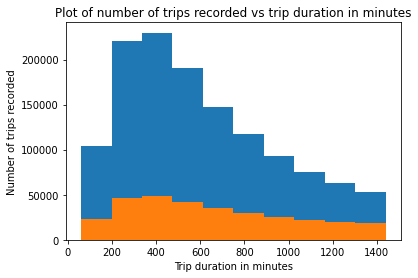

In [157]:
plt.hist(cbMay19_weekdays['tripduration'])
plt.hist(cbMay19_weekends['tripduration'])
plt.title("Plot of number of trips recorded vs trip duration in minutes")
plt.xlabel("Trip duration in minutes")
plt.ylabel("Number of trips recorded")

The histogram shows that there are a higher number of trips recorded on the weekdays(blue colored bars) than on the weekends(orange colored bars)

In [158]:
gender = cbMay19_weekdays.gender
gender

0          1
1          0
3          1
4          1
6          1
          ..
1924555    1
1924556    2
1924558    2
1924559    2
1924562    2
Name: gender, Length: 1292882, dtype: int64

In [159]:
maleweekdays = cbMay19_weekdays[cbMay19_weekdays['gender']==1]

In [160]:
femaleweekdays = cbMay19_weekdays[cbMay19_weekdays['gender']==2]

(array([17889., 44341., 50667., 45205., 36807., 30375., 24433., 19507.,
        16164., 13751.]),
 array([  61. ,  198.8,  336.6,  474.4,  612.2,  750. ,  887.8, 1025.6,
        1163.4, 1301.2, 1439. ]),
 <a list of 10 Patch objects>)

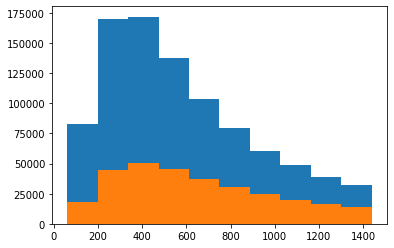

In [161]:
plt.hist(maleweekdays['tripduration'])
plt.hist(femaleweekdays['tripduration'])

In [162]:
gender = cbMay19_weekends.gender
gender

192003     1
192004     2
192005     2
192006     1
192007     1
          ..
1607614    1
1607615    0
1607616    0
1607617    1
1607618    0
Name: gender, Length: 308966, dtype: int64

In [163]:
maleweekends = cbMay19_weekends[cbMay19_weekends['gender']==1]

In [164]:
femaleweekends = cbMay19_weekends[cbMay19_weekends['gender']==2]

(array([ 4322., 10292., 11977., 11119.,  9334.,  7849.,  6772.,  5914.,
         5151.,  4721.]),
 array([  61. ,  198.8,  336.6,  474.4,  612.2,  750. ,  887.8, 1025.6,
        1163.4, 1301.2, 1439. ]),
 <a list of 10 Patch objects>)

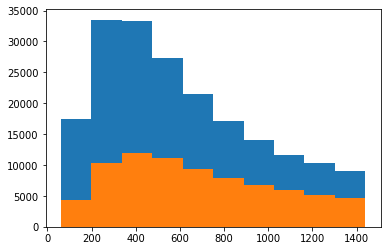

In [165]:
plt.hist(maleweekends['tripduration'])
plt.hist(femaleweekends['tripduration'])

(array([17453., 33521., 33330., 27331., 21571., 17195., 14027., 11656.,
        10343.,  9039.]),
 array([  61. ,  198.8,  336.6,  474.4,  612.2,  750. ,  887.8, 1025.6,
        1163.4, 1301.2, 1439. ]),
 <a list of 10 Patch objects>)

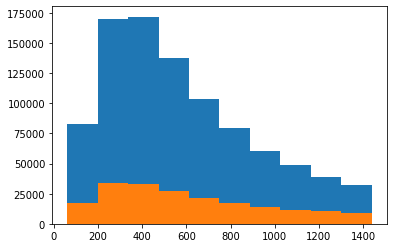

In [166]:
plt.hist(maleweekdays['tripduration'])
plt.hist(maleweekends['tripduration'])

There are more males taking trips on the weekdays than there are on the weekends

(array([ 4322., 10292., 11977., 11119.,  9334.,  7849.,  6772.,  5914.,
         5151.,  4721.]),
 array([  61. ,  198.8,  336.6,  474.4,  612.2,  750. ,  887.8, 1025.6,
        1163.4, 1301.2, 1439. ]),
 <a list of 10 Patch objects>)

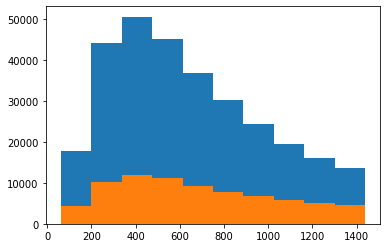

In [167]:
plt.hist(femaleweekdays['tripduration'])
plt.hist(femaleweekends['tripduration'])

There are more women taking trips on the weekdays than there are on the weekends